# Mushrooms!
 * CSCI 183, Spring 2017 
 * Erin Gates, Madyson Morris, Tiffany Palmer 

"Leaves of three, let me be" helps you stay away poison oak, but how do you avoid poison mushrooms?

In seeking to answer this question, we analyzed data on various poisous and edible mushrooms and compared the  accuracies of various classification algorithms.

In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib as plt

#import bernoulli naive bayes from scikit-learn
import sklearn as sk
#seaborn for pretty plots
import seaborn as sns

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

#display versions of python and packages

print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
print('sk-learn version ' + sk.__version__)
print('seaborn version ' + sns.__version__)

pandas version 0.19.2
numpy version 1.11.3
sk-learn version 0.18.1
seaborn version 0.7.1


## Exploratory Data Analysis
* What does our data look like?
* We have data for 22 features, which ones are relevant to our classification?

## How are the mushrooms distributed? 
### The 8124 mushrooms are about evenly split between edible and poisonous

In [2]:
#read in data. it's comma-separated with no column names.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', sep=',', header=None,
                 error_bad_lines=False, warn_bad_lines=True, low_memory=False)
# set pandas to output all of the columns in output
pd.options.display.max_columns = 25
#show the first 5 rows
print(df.sample(n=5))

     0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22
3169  p  x  s  g  f  c  f  w  n  u  e  b  s  s  w  w  p  w  o  p  n  s  d
3364  e  f  y  e  t  n  f  c  b  p  t  b  s  s  g  p  p  w  o  p  n  y  d
2073  e  x  f  n  t  n  f  c  b  u  t  b  s  s  p  g  p  w  o  p  k  y  d
2084  e  f  f  g  f  n  f  w  b  n  t  e  s  f  w  w  p  w  o  e  k  s  g
3209  p  x  f  w  f  c  f  c  n  u  e  b  s  s  w  w  p  w  o  p  n  s  d


In [3]:
#manually add column names from documentation (1st col is class: e=edible,p=poisonous; rest are attributes)
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
             'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
             'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
             'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']

e    4208
p    3916
Name: class, dtype: int64


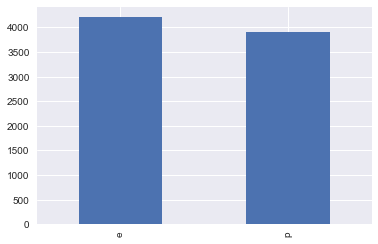

In [4]:
#show plots in notebook
%matplotlib inline

#bar chart of classes using pandas plotting
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar')

# How are certain features correlated to classification? 

## Edibility by Gill Color
### Buff=b colored gills are indicative of a poisonous classification

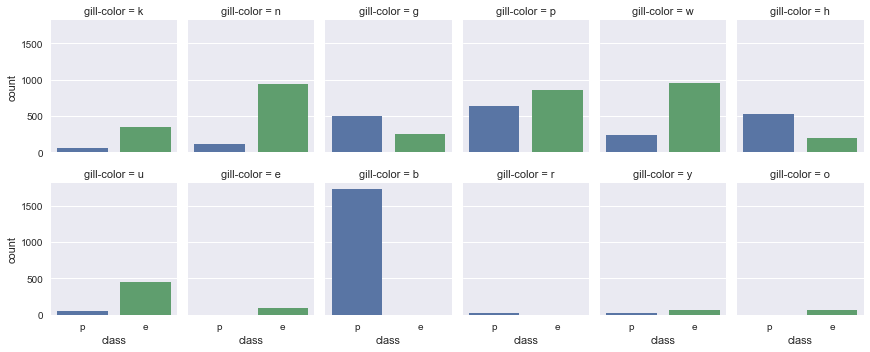

In [5]:
df_forplot = df
g = sns.factorplot("class", col="gill-color", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

### Distribution of Veil Type
It looks like there's only one type of veil in our data set, so we can ignore that feature in our analysis!

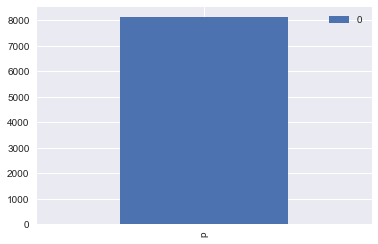

In [6]:
# Distribution for veil-type
from collections import Counter

letter_counts = Counter(df["veil-type"])
df_forveil = pd.DataFrame.from_dict(letter_counts, orient='index')
df_forveil.plot(kind="bar")

## Try out the Classifier on Different Feature Combinations


In [22]:
#drop extraneous features
#df = df.drop("veil-type", 1)

#put the features into X (everything except the 0th column)
X = pd.DataFrame(df, columns=df.columns[1:len(df.columns)], index=df.index)

#put the class values (0th column) into Y 
Y = df['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y = le.transform(Y)
#print(y_train)

#have to initialize or get error below
x = pd.DataFrame(X,columns=[X.columns[0]])
#encode each feature column and add it to x_train
for colname in X.columns:
    le.fit(X[colname])
    #print(colname, le.classes_)
    x[colname] = le.transform(X[colname])

print('\nExample Feature Values - row 1 in X:')
print(X.iloc[1])
print('\nExample Encoded Feature Values - row 1 in x:')
print(x.iloc[1])
print('\nClass Values (Y):')
print(np.array(Y))
print('\nEncoded Class Values (y):')
print(y)


Example Feature Values - row 1 in X:
cap-shape                 x
cap-surface               s
cap-color                 y
bruises                   t
odor                      a
gill-attachment           f
gill-spacing              c
gill-size                 b
gill-color                k
stalk-shape               e
stalk-root                c
stalk-surf-above-ring     s
stalk-surf-below-ring     s
stalk-color-above-ring    w
stalk-color-below-ring    w
veil-color                w
ring-number               o
ring-type                 p
spore-color               n
population                n
habitat                   g
Name: 1, dtype: object

Example Encoded Feature Values - row 1 in x:
cap-shape                 5
cap-surface               2
cap-color                 9
bruises                   1
odor                      0
gill-attachment           1
gill-spacing              0
gill-size                 0
gill-color                4
stalk-shape               0
stalk-root               

### Classify:


In [23]:
#split the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1000, random_state=(42))

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

('Training accuracy:', 0.844329028635598)
('Testing accuracy:', 0.85099999999999998)


In [24]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, test_predict, target_names=['edible','poisonous']))
print("\nConfusion Matrix:")
skcm = metrics.confusion_matrix(y_test,test_predict)
#putting it into a dataframe so it prints the labels
skcm = pd.DataFrame(skcm, columns=['predicted-edible','predicted-poisonous'])
skcm['actual'] = ['edible','poisonous']
skcm = skcm.set_index('actual')

#NOTE: NEED TO MAKE SURE I'M INTERPRETING THE ROWS & COLS RIGHT TO ASSIGN THESE LABELS!
print(skcm)

print("\nScore (same thing as test accuracy?): ", skgnb.score(x_test,y_test))


Classification Report:
             precision    recall  f1-score   support

     edible       0.80      0.95      0.87       527
  poisonous       0.93      0.74      0.83       473

avg / total       0.86      0.85      0.85      1000


Confusion Matrix:
           predicted-edible  predicted-poisonous
actual                                          
edible                  499                   28
poisonous               121                  352
('\nScore (same thing as test accuracy?): ', 0.85099999999999998)


## Which alpha is best?

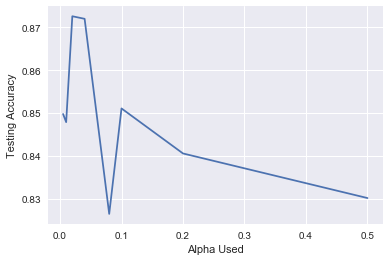

In [25]:
#graph of alphas and corresponding accuracies
a = [.005,.01,.02,.04,.08,.1,.2,.5]
b = [.8498,.8479,.8726,.872,.8265,.8511,.8406,.8302]

plt.xlabel('Alpha Used')
plt.ylabel('Testing Accuracy')
plt.plot(a, b)
plt.show()

## K-Fold Cross Validations

In [26]:
from sklearn.model_selection import cross_val_score
#5-fold cross validation
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
scores = cross_val_score(skgnb, x, y, cv=5)

print("5-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

5-Fold Cross Validation Accuracy: 0.76 (+/- 0.30)


In [27]:
scores = cross_val_score(skgnb, x, y, cv=7)

print("7-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

7-Fold Cross Validation Accuracy: 0.78 (+/- 0.21)


In [28]:
scores = cross_val_score(skgnb, x, y, cv=10)

print("10-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

10-Fold Cross Validation Accuracy: 0.81 (+/- 0.22)


## BernoulliNB for optimal reduced data set based on correlation matrices

In [17]:
#drop extraneous features
df_r3 = df.loc[:,('class','bruises','gill-size','gill-color','stalk-surf-above-ring','ring-type','spore-color','population','habitat')]

df_r3.head()

,class,bruises,gill-size,gill-color,stalk-surf-above-ring,ring-type,spore-color,population,habitat
0,p,t,n,k,s,p,k,s,u
1,e,t,b,k,s,p,n,n,g
2,e,t,b,n,s,p,n,n,m
3,p,t,n,n,s,p,k,s,u
4,e,f,b,k,s,e,n,a,g


In [18]:
#put the features into X (everything except the 0th column)
X_r3 = pd.DataFrame(df_r3, columns=df_r3.columns[1:len(df_r3.columns)], index=df_r3.index)

#put the class values (0th column) into Y 
Y_r3 = df_r3['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_r3)

#Y values now boolean values; poison = 1
y_r3 = le.transform(Y_r3)


#have to initialize or get error below
x_r3 = pd.DataFrame(X_r3,columns=[X_r3.columns[0]])
#encode each feature column and add it to x_train
for colname in X_r3.columns:
    le.fit(X_r3[colname])
    #print(colname, le.classes_)
    x_r3[colname] = le.transform(X_r3[colname])

In [19]:
#split the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_r3, y_r3, test_size=1000, random_state=(42))

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

('Training accuracy:', 0.74564851207186977)
('Testing accuracy:', 0.73599999999999999)


## Accuracy Comparison for Original and Reduced Data Sets 

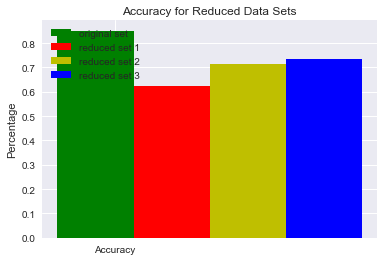

In [20]:
N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()

r0_values = (.851)
rects0 = ax.bar(ind, r0_values, width, color='g')

r1_values = (.624)
rects1 = ax.bar(ind + width, r1_values, width, color='r')

r2_values = (.714)
rects2 = ax.bar(ind + width + width, r2_values, width, color='y')

r3_values = (.736)
rects3 = ax.bar(ind + width + width + width, r3_values, width, color='b')


# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage')
ax.set_title('Accuracy for Reduced Data Sets')
ax.set_xticks(ind + width / 4)
ax.set_xticklabels(('Accuracy', 'Accuracy'))

ax.legend((rects0[0],rects1[0], rects2[0], rects3[0]),('original set','reduced set 1', 'reduced set 2', 'reduced set 3'))

    
plt.show()

## Graph of Accuracy, Precision, and Recall for Naive Bayes (orig. set) and Decision Tree

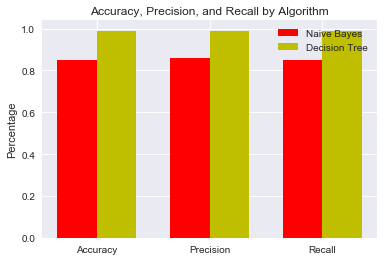

In [29]:
N = 3
nb_values = (.85, .86, .85)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, nb_values, width, color='r')

dt_values = (.99, .99, .99)
rects2 = ax.bar(ind + width, dt_values, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage')
ax.set_title('Accuracy, Precision, and Recall by Algorithm')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Accuracy', 'Precision', 'Recall'))

ax.legend((rects1[0], rects2[0]),('Naive Bayes', 'Decision Tree'))

plt.show()